In [1]:
import numpy as np
from scipy.stats import norm
import random
import matplotlib.pyplot as plt


JUSTIFICATION FOR THE APPLICATION OF CLT

The empirical wins and losses and their associated are approximated from a sample of 600k I've played in a PokerTracker4 database with the average win/loss normalized to 0. The empirical_std of 10 Big Blinds per hand corresponds to 100 per 100 hands, which is approximately the avereage in 6-handed nlh games. After a few hundred hands, the limit Normal distribution with mu = empirical_avg and std = empirical_std*sqrt(n_hands) closely approximates the true distribution of winnings.

10.049378090210357


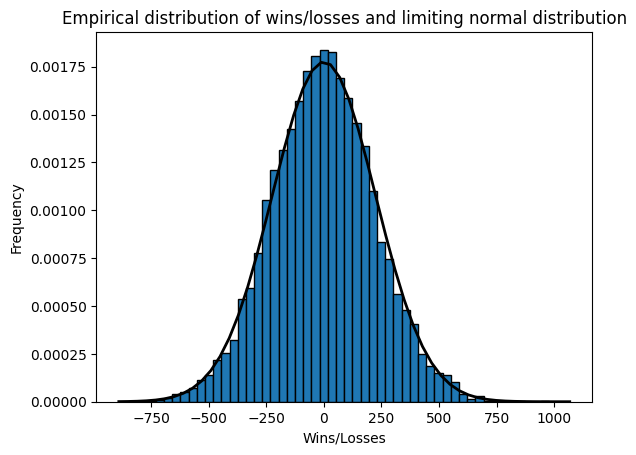

In [2]:
n_hands = 500 #number of hands to be simulated for bootstrap batch
n_sims = 10000 #number of bootstrap batches
win_loss = np.array([0, 1, -1, 3, -3, 10, -10, 30, -30, 100, -100]) #win/loss sizes in BB
win_loss_probs = 0.01*np.array([43.7, 16.5, 16.5, 7, 7, 3, 3, 1.3, 1.3, .35, .35]) #win/loss frequencies

#function to compute the average and standard deviation of the win/loss
def weighted_avg_and_std(values, weights):
    average = np.average(values, weights=weights)
    variance = np.average((values-average)**2, weights=weights)
    standard_dev = variance**.5
    return (average, standard_dev)

empirical_avg, empirical_std = weighted_avg_and_std(win_loss, win_loss_probs)
print(empirical_std)
 
def bootstrap(n_sims, n_hands):
    sims = []
    for i in range(n_sims):
        sim = np.random.choice(win_loss, size=n_hands, p=win_loss_probs)
        sims.append(sum(sim))
    return sims

#running n_sims iterations of the bootstrap, each simulating n_hands from the empirical win/loss distribution
sims = bootstrap(n_sims, n_hands)

#plotting a histogram of the simulated wins/losses in BBs after n_hands
plt.hist(sims, bins=50, edgecolor='black', density = True)

# Adding labels and title
plt.xlabel('Wins/Losses')
plt.ylabel('Frequency')
plt.title('Empirical distribution of wins/losses and limiting normal distribution')

#Setting the mean and std of the limit normal distribution. From the Central Limit Theorem, the std scales by the squareroot of n_hands.
mu, std = empirical_avg, empirical_std*(n_hands)**.5

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax)

#Limit normal distribution
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', linewidth=2)

plt.show()